In [1]:
import pyqrcode
from PIL import Image
import PySimpleGUI as sg 
# image_viewer.py
import io
import os

# Set the theme for GUI
sg.theme('Default1')

# Ask user to enter url, choose a folder destination and file name for the QR Code
layout = [
            [sg.Text("Generate a QR Code\n")],
# Ask to imput a url 
            [sg.Text("Enter anything to generate a QR code: "), sg.InputText(size=(25,1))],
            [sg.Text("Select a folder destination: "), sg.Input(size=(25,1), key="-FOLDER-"), sg.FolderBrowse()],
            [sg.Text("Choose a file name include .png: "), sg.InputText(size=(25,1), key="-FILE-")],
            [sg.Text("\n")],
            [sg.Image(key="-IMAGE-")],
            [sg.Button('Generate'),sg.Button('Cancel')]
]

# Create the Window
window = sg.Window('QR Code Generator', layout)    

while True:
# Read user input
        event, values = window.read()
        
        if event == sg.WIN_CLOSED or event == 'Cancel':
            break
# set the values provided by the user (url, file path and file name)           
        link = values[0]
        folder = values['-FOLDER-']
        picture = values['-FILE-']
        
# If user clicks on generate button  
        if event == 'Generate':
# Process to generate QR Code starts
            sg.popup("Generating QR Code...")
            qr_code = pyqrcode.create(link)
# File path and file name concatenate and are set as parameters
            qr_code.png(folder +'/'+ picture, scale = 5)
            Image.open(folder +'/'+ picture)
            view = folder +'/'+ picture
            image = Image.open(view)
            image.thumbnail((400, 400))
# BytesIO is used for binary data
            bio = io.BytesIO()
# Creates file like object that operate on string data
            image.save(bio, format="PNG")
# QR code will popup in the QR Code window once process is completed
            window["-IMAGE-"].update(data=bio.getvalue())
            sg.Image(folder+'/'+picture,size = (400,300))

# Break while loop if window is closed or user clicks cancel
        elif event == sg.WIN_CLOSED or event == 'Cancel':
            break
        else:
            sg.popup_error("Enter valid input")
        
# if user closes window or clicks cancel
        if event == sg.WIN_CLOSED or event == 'Cancel':
            break
        
# Close window   
window.close()                                                                               
                                                                             



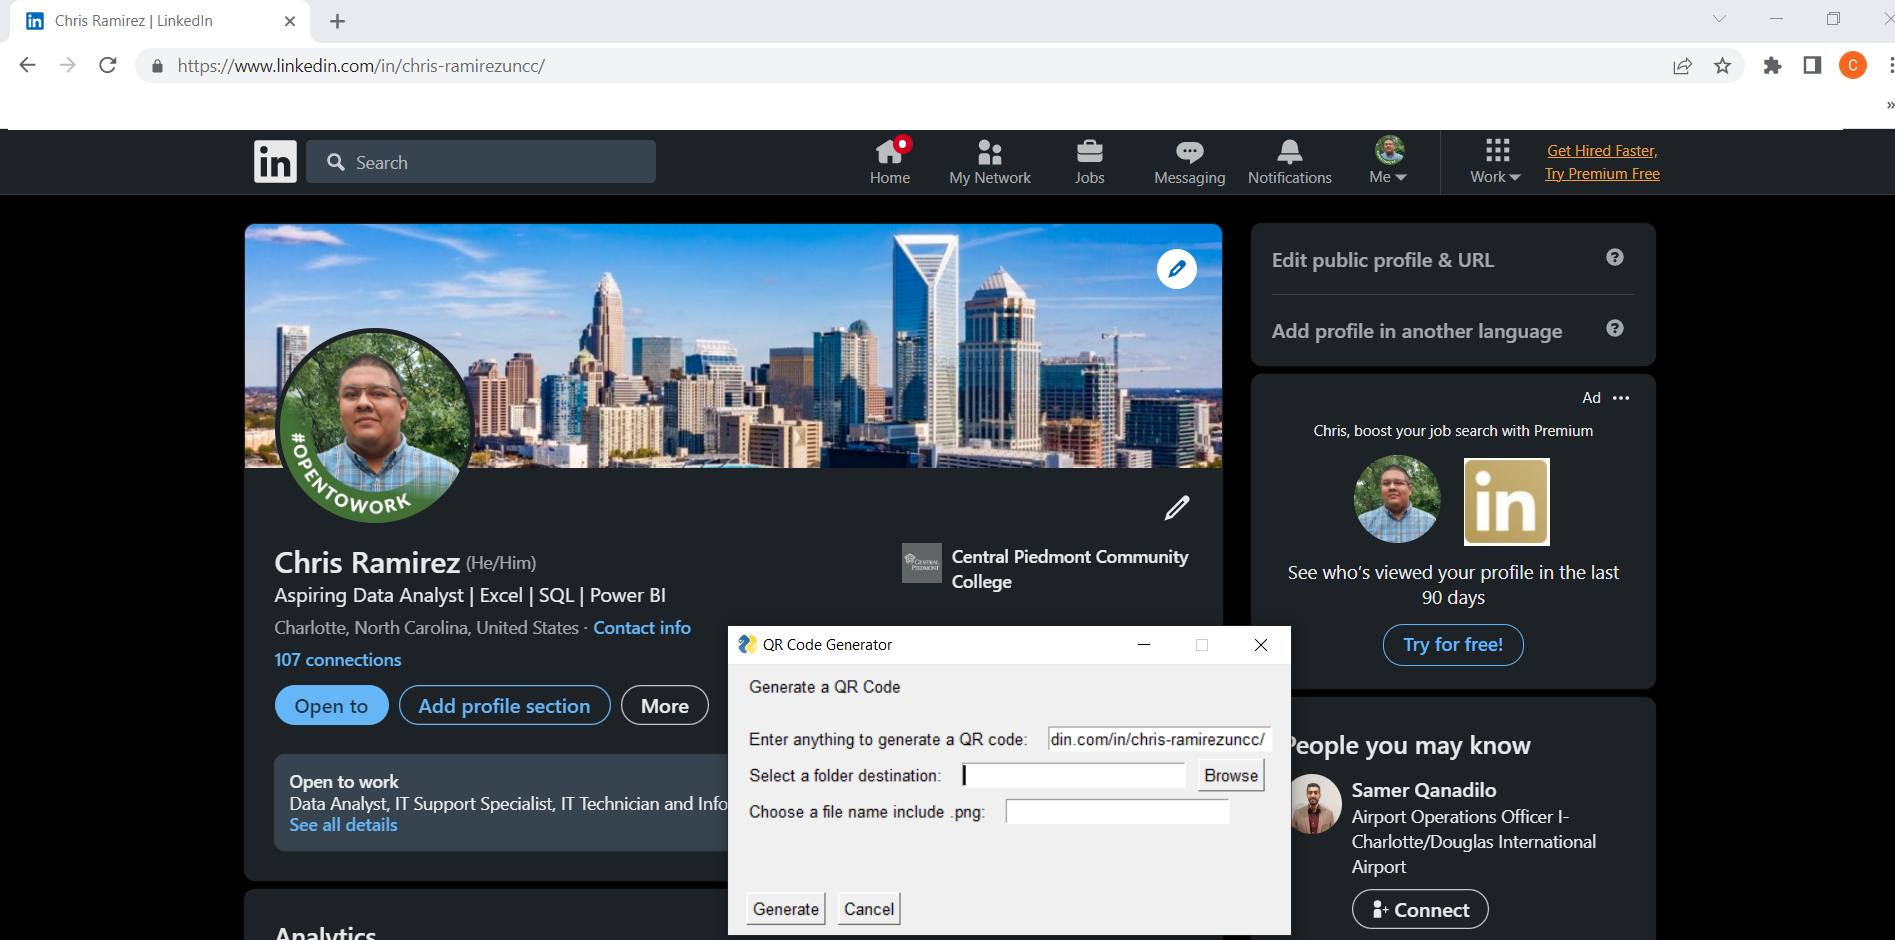

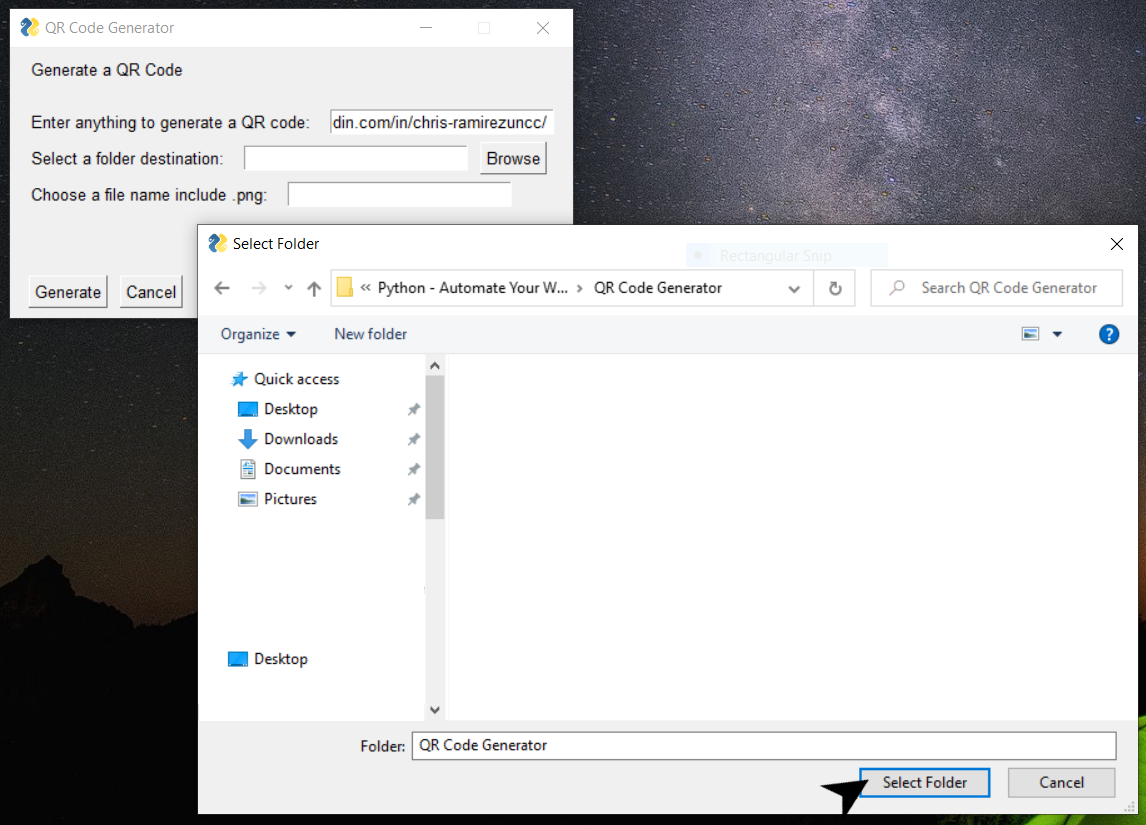

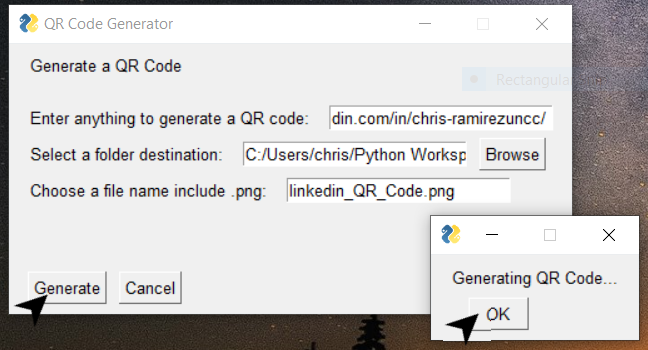

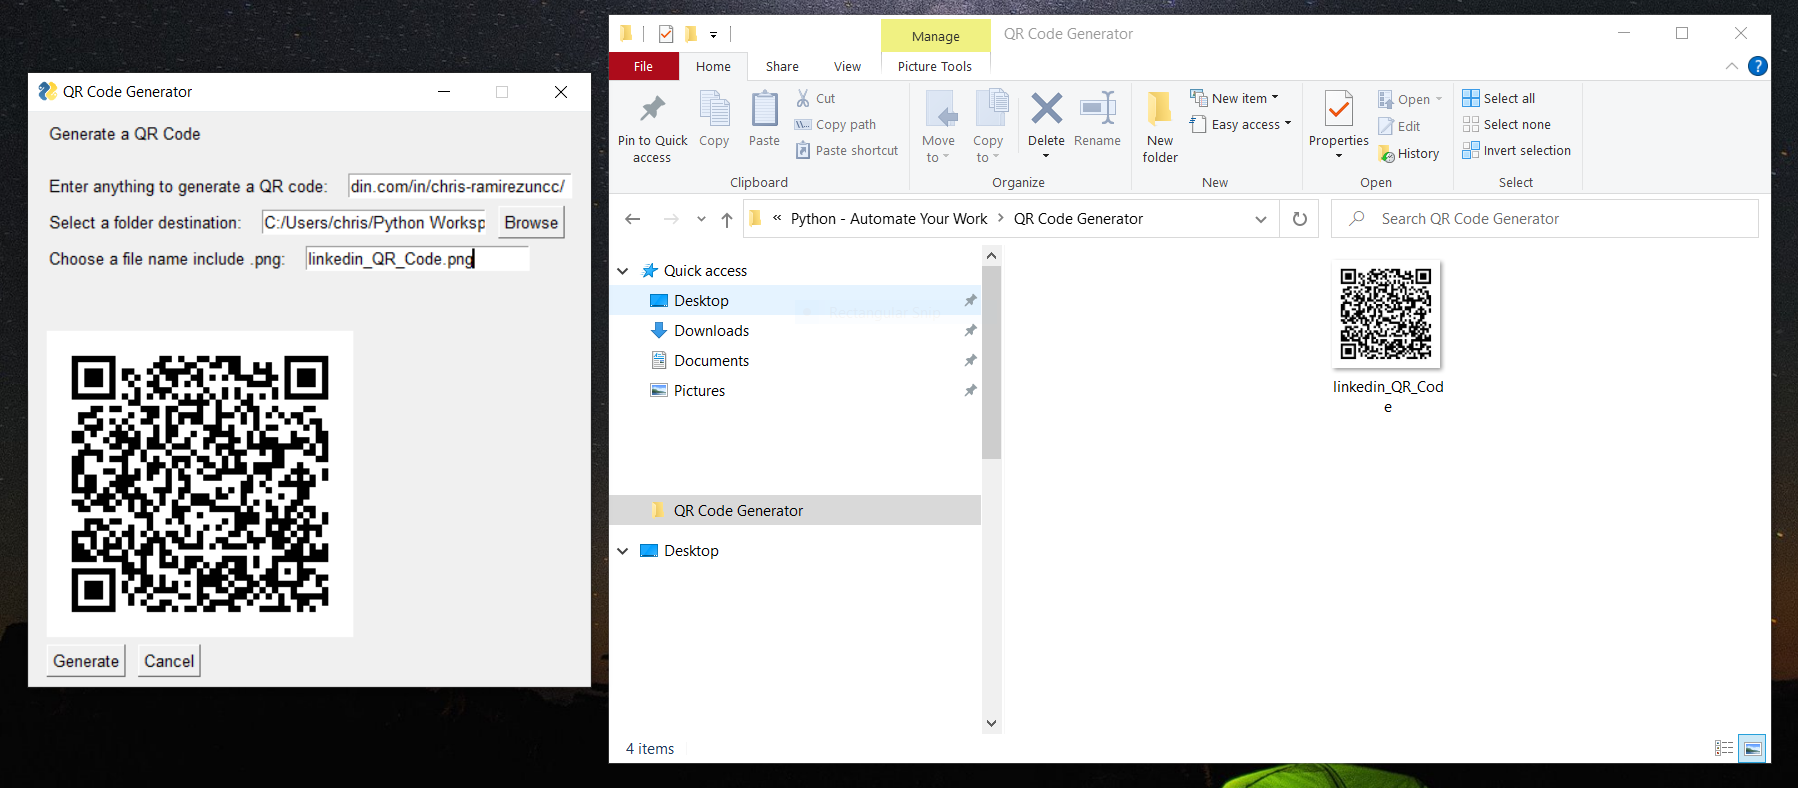